In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

## Do brazil 

In [13]:
df = pd.read_csv("../data/doBrazil/Complete_DataSet.csv")
df.drop_duplicates(subset = "Lat", keep = 'first', inplace=True)

In [14]:
df

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,...,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG
0,2022-07-06,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,...,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487
2,2022-07-06,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,...,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487
4,2022-07-06,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,...,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487
6,2022-07-06,187,4,1,-20.446333,-54.838763,G3,1,49.774424,8.110455,...,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487
8,2022-07-06,187,5,1,-20.446437,-54.839261,Q2,1,51.658871,4.611986,...,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2023-03-01,60,152,1,-20.447019,-54.838597,Q2,1,30.582108,8.228557,...,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911
304,2023-03-01,60,153,1,-20.446148,-54.838599,Q3,1,33.284583,7.614034,...,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911
306,2023-03-01,60,154,1,-20.446365,-54.838516,Q4,1,32.022107,11.254015,...,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911
308,2023-03-01,60,155,1,-20.446937,-54.839311,S1,0,45.505167,8.263333,...,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911


In [3]:
df.columns

Index(['Date', 'DOY', 'Sample', 'Sub-Sample', 'Lat', 'Long_', 'Sample_type',
       'Animals', 'DM', 'MM', 'Biomass', 'NDF', 'ADF', 'CP', 'TDN_based_ADF',
       'TDN_based_NDF', 'Satellite_Images_Dates', 'B1', 'B2', 'B3', 'B4', 'B5',
       'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDWI', 'EVI',
       'LAI', 'DVI', 'GCI', 'GEMI', 'SAVI', 'TEMP_MAX', 'TEMP_MIN', 'RAD_SOL',
       'RAIN', 'WIND_SPD', 'EVAPOT', 'PRES_ATM', 'HUM_REL', 'TP_SFC_AVG',
       'Wind_Dir', 'Dew_Point', 'Radiative_Dif_AVG', 'Radiative_Direct_AVG',
       'PPFD', 'Longwave_Rad_AVG'],
      dtype='object')

In [4]:
X = df[['B1', 'B2', 'B3', 'B4', 'B5',
       'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']] 
y = df[['Biomass']]

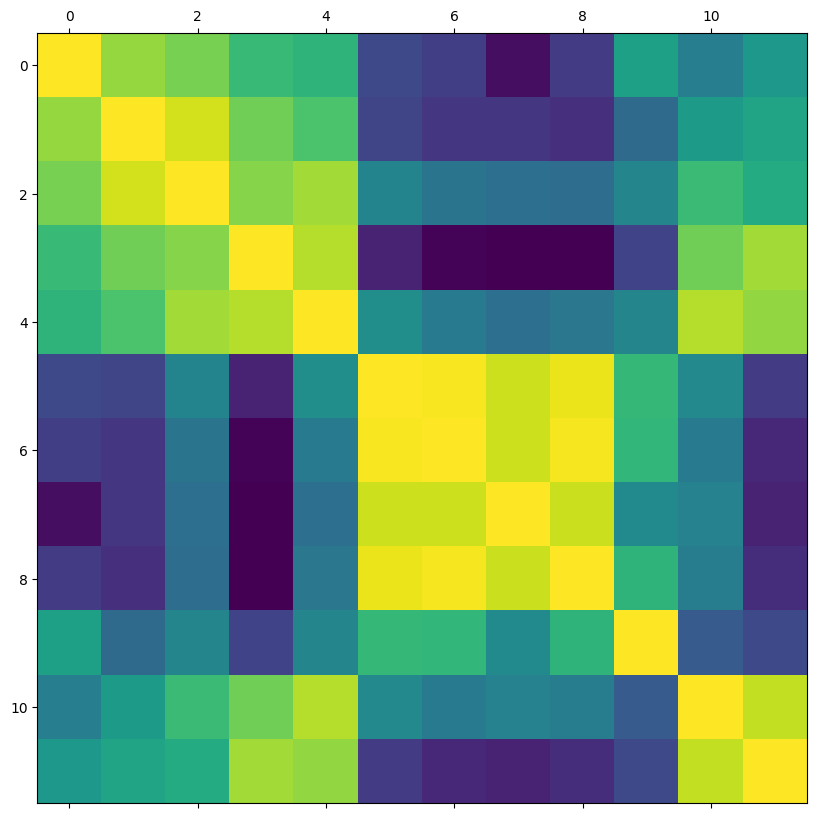

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(X.corr())
plt.show()

In [6]:
len(y)

152

In [7]:
X = np.array(X)
y = np.array(y).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
y_pred = rfc.predict(X_test)


In [10]:
def display_result(y_pred, y_test):
    plt.scatter(y_pred, y_test)
    plt.plot([0, max(y_test)], [0, max(y_test)], c='red')
    plt.show()

    print(f'R2_score : {r2_score(y_test.flatten(), y_pred)}')
    print(f'root_mean_squared_error : {root_mean_squared_error(y_test.flatten(), y_pred)}')
    print(f'root_mean_squared_error % : {root_mean_squared_error(y_test.flatten(), y_pred)/y_test.mean()}')
    print(f'mean_absolute_error : {mean_absolute_error(y_test.flatten(), y_pred)}')
    print(f'mean_absolute_error % : {mean_absolute_error(y_test.flatten(), y_pred)/y_test.mean()}')

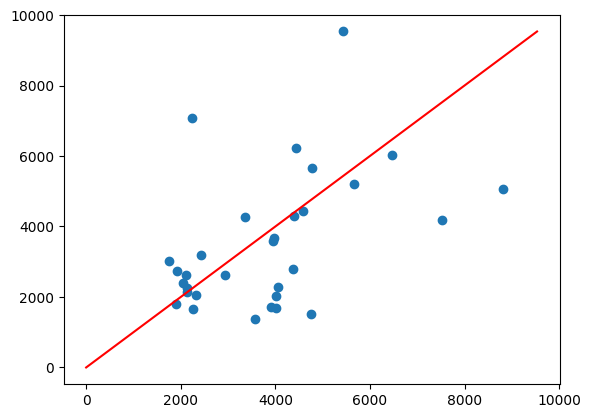

R2_score : 0.005713958362399185
root_mean_squared_error : 1880.2935194914855
root_mean_squared_error % : 0.5336330984954607
mean_absolute_error : 1347.6637379355307
mean_absolute_error % : 0.38247112418863405


In [11]:
display_result(y_pred, y_test)

## GBOV 

In [2]:
in_situ = pd.read_csv("../data/GBOV/GBOV_RM07_in_situ.csv")
simulated = pd.read_csv("../data/GBOV/PROSAIL_LUT_S2_100000_generic.csv")

In [6]:
len(in_situ.plotID.unique())

244

In [10]:
culture = ['grasslandHerbaceous','pastureHay']
filtre = in_situ.nlcdClass.isin(culture)
in_situ = in_situ.loc[filtre]

In [12]:
in_situ.plotID.unique()

array(['LAJA_047', 'LAJA_054', 'LAJA_065', 'NIWO_003', 'NIWO_006',
       'NIWO_008', 'NIWO_013', 'NIWO_018', 'NIWO_023', 'NIWO_024',
       'NIWO_048', 'NIWO_054', 'NIWO_056', 'NIWO_060', 'ORNL_021',
       'SCBI_006', 'SCBI_035', 'WOOD_001', 'WOOD_002', 'WOOD_003',
       'WOOD_004', 'WOOD_005', 'WOOD_006', 'WOOD_007', 'WOOD_008',
       'WOOD_009', 'WOOD_010', 'WOOD_011', 'WOOD_013', 'WOOD_058',
       'WOOD_064', 'WOOD_069'], dtype=object)

In [27]:
print(in_situ[['LAI_Warren', 'LAI_Miller']].corr())

            LAI_Warren  LAI_Miller
LAI_Warren    1.000000    0.978964
LAI_Miller    0.978964    1.000000


In [39]:
in_situ

,Unnamed: 0,Site,date,plotID,retrieval_date,LAI_Miller,LAI_Warren,B1,B2,B3,...,QA10,QA20,QA60,cloud_probability,nlcdClass,observer_azimuth,observer_zenith,solar_zenith,solar_azimuth,relative_azimuth
424,424,LajasExperimentalStation,2016-04-15,LAJA_047,2016-04-23,0.029,0.045,0.141888,0.129629,0.135770,...,0.0,0.0,0.0,53.0,pastureHay,102.438965,7.792266,20.164314,103.431980,0.993016
425,425,LajasExperimentalStation,2016-04-29,LAJA_047,2016-05-03,0.086,0.099,0.064298,0.066453,0.091925,...,0.0,0.0,0.0,4.0,pastureHay,101.955468,7.783850,19.033614,94.727667,352.772199
426,426,LajasExperimentalStation,2016-05-13,LAJA_047,2016-05-03,2.610,2.010,0.064298,0.066453,0.091925,...,0.0,0.0,0.0,4.0,pastureHay,101.955468,7.783850,19.033614,94.727667,352.772199
427,427,LajasExperimentalStation,2016-07-08,LAJA_047,2016-07-12,0.074,0.080,0.066660,0.072789,0.092392,...,0.0,0.0,0.0,3.0,pastureHay,102.281269,7.816789,20.886723,77.051523,334.770254
428,428,LajasExperimentalStation,2016-07-22,LAJA_047,2016-07-22,0.095,0.086,0.052031,0.064741,0.086830,...,0.0,0.0,0.0,2.0,pastureHay,101.961416,7.807118,20.970392,81.955956,339.994540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,2999,Woodworth,2019-08-20,WOOD_069,2019-08-19,0.782,0.529,0.020699,0.030207,0.060030,...,0.0,0.0,0.0,1.0,grasslandHerbaceous,106.243290,7.509906,36.952902,154.686462,48.443172
3000,3000,Woodworth,2019-09-04,WOOD_069,2019-09-06,0.396,0.311,0.026859,0.039025,0.063793,...,0.0,0.0,0.0,1.0,grasslandHerbaceous,286.846105,7.194226,42.176381,162.841375,235.995271
3001,3001,Woodworth,2019-09-18,WOOD_069,2019-09-18,0.530,0.383,0.111281,0.103496,0.117937,...,0.0,0.0,0.0,63.0,grasslandHerbaceous,106.061342,7.573551,46.941531,162.175233,56.113891
3002,3002,Woodworth,2019-10-04,WOOD_069,2019-10-06,0.857,0.650,0.039922,0.045057,0.068648,...,0.0,0.0,0.0,4.0,grasslandHerbaceous,286.941404,7.184210,53.152337,168.873554,241.932150


In [36]:
X_in_situ = in_situ[['B1', 'B2', 'B3', 'B4', 'B5',
       'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12']] 
y_in_situ = in_situ['LAI_Warren'] #LAI_Warren, LAI_Miller
X_simulated = simulated[['B1', 'B2', 'B3', 'B4', 'B5',
       'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12']] 
y_simulated = simulated['LAI_Warren'] #LAI_Warren, LAI_Miller

In [37]:
X_train = np.array(X_simulated)
y_train = np.array(y_simulated).reshape(-1)
X_test = np.array(X_in_situ)
y_test = np.array(y_in_situ).reshape(-1)

#### RandomForest

In [30]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
y_pred = rfr.predict(X_test)

In [32]:
np.shape(X_test)

(529, 13)

In [38]:
X_test

array([[ 0.14188774,  0.12962879,  0.13577006, ..., 27.61791541,
         0.27700864,  0.19880483],
       [ 0.06429837,  0.06645315,  0.09192533, ..., 12.50250077,
         0.40681801,  0.25686394],
       [ 0.06429837,  0.06645315,  0.09192533, ..., 12.50250077,
         0.40681801,  0.25686394],
       ...,
       [ 0.11128136,  0.10349573,  0.11793728, ...,  4.72293175,
         0.39026129,  0.22792846],
       [ 0.03992193,  0.04505657,  0.068648  , ...,  0.58466254,
         0.26428021,  0.14322074],
       [ 0.29543209,  0.29663674,  0.32329767, ...,  5.28132493,
         0.20252527,  0.12013096]])

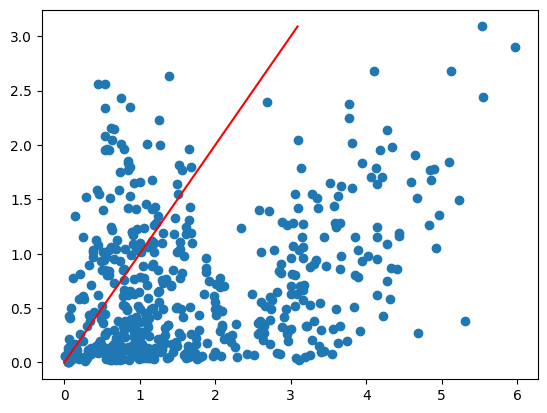

R2_score : -5.1108860995994565
root_mean_squared_error : 1.5818394369486444
root_mean_squared_error % : 2.2789666551433907
mean_absolute_error : 1.2105690873345936
mean_absolute_error % : 1.7440749796355433


In [33]:
display_result(y_pred, y_test)

In [34]:
import joblib
joblib.dump(rfr, "RF_LAI_regressor.joblib")

['RF_LAI_regressor.joblib']

#### Reseau de Neurones

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [127]:
#creating a function with a model architecture
def create_model():
    model = Sequential([
        Dense(12, activation='relu'),
        Dense(6, activation='relu'),
        Dense(1, activation = 'relu'),
    ])
    model.compile(optimizer='Adam', loss="mean_squared_error")#, metrics=['accuracy']
    return model

#create model
model = create_model()
#create an early stopping object
callback = EarlyStopping(min_delta=1e-5, patience = 20, mode = "min", monitor = "val_loss", restore_best_weights=True)
#fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1, batch_size=256, callbacks = [callback])

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19.3720 - val_loss: 5.9926
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6095 - val_loss: 1.2825
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6386 - val_loss: 1.4521
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5019 - val_loss: 1.5998
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4450 - val_loss: 1.6720
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3957 - val_loss: 1.7625
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3419 - val_loss: 1.7434
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3037 - val_loss: 1.8275
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2892 - val_loss: 1.8247
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2501 - val_loss: 1.8886
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2240 - val_loss: 1.8987
Epoch 12/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [128]:
y_pred = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


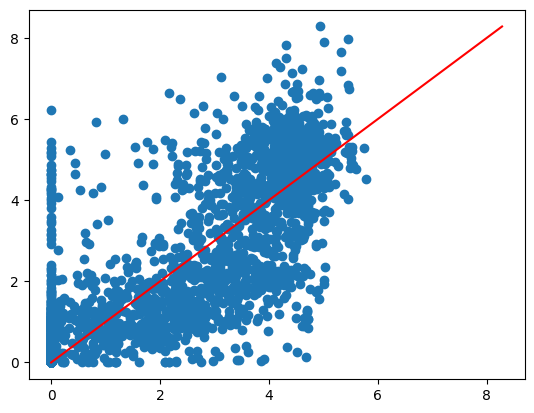

R2_score : 0.6818793850174006
root_mean_squared_error : 1.13246744718548
root_mean_squared_error % : 0.6058123637990352
mean_absolute_error : 0.7254574867070941
mean_absolute_error % : 0.3880827797302241


In [129]:
display_result(y_pred, y_test)

#### Shapley values

In [33]:
import shap

In [ ]:
shap_values = shap.TreeExplainer(rfc).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")